In [1]:
!pip install pandas-profiling --quiet

In [2]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('medical.csv')

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
!pip install plotly matplotlib seaborn --quiet

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()


In [13]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [17]:
fig = px.histogram(medical_df,
                   x= 'bmi',
                   marginal = 'box',
                   nbins = 39,
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

In [18]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [19]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence= ['green', 'grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [20]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
px.histogram(medical_df, x = 'smoker', color = 'sex', title = "Smoker")

In [22]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title = 'Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [23]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title = 'BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [24]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [25]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [26]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [28]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

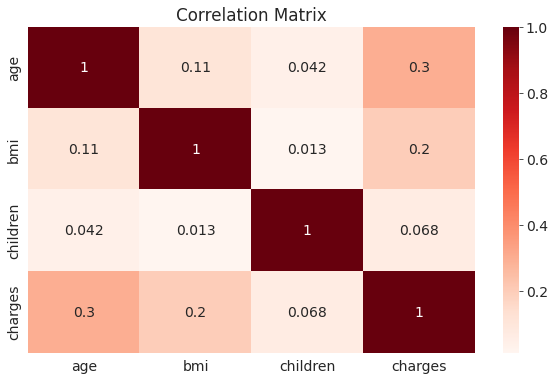

In [30]:
sns.heatmap(medical_df.corr(), cmap = "Reds", annot = True)
plt.title('Correlation Matrix')

In [31]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

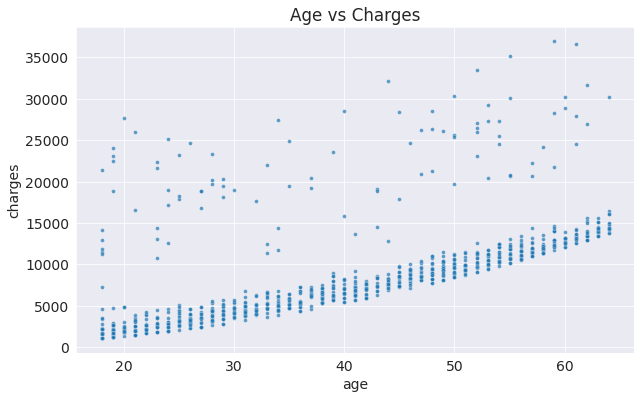

In [32]:
plt.title('Age vs Charges')
sns.scatterplot(data= non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s=15);

In [33]:
def estimate_charges(age, w, b):
  return w * age + b

In [34]:
w = 50
b = 100

In [37]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
print(estimated_charges)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64


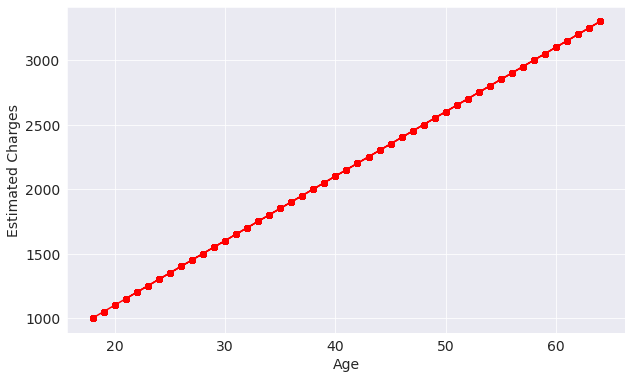

In [38]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

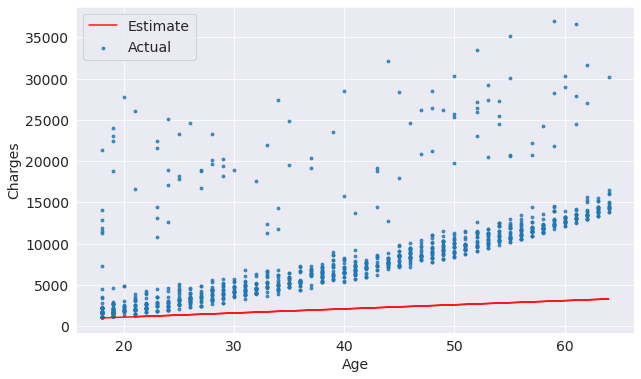

In [39]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [40]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)
  
  plt.plot(ages, estimated_charges, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual']);


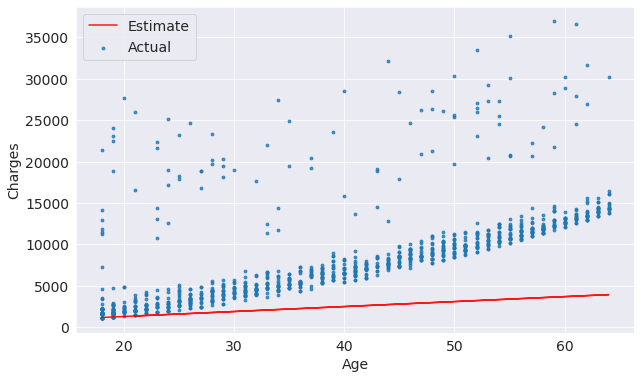

In [42]:
try_parameters(60,100)

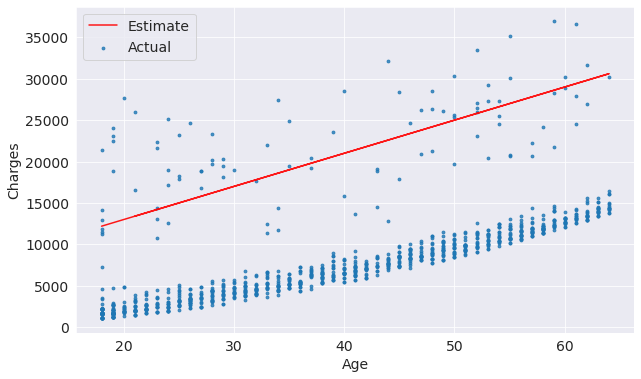

In [43]:
try_parameters(400,5000)

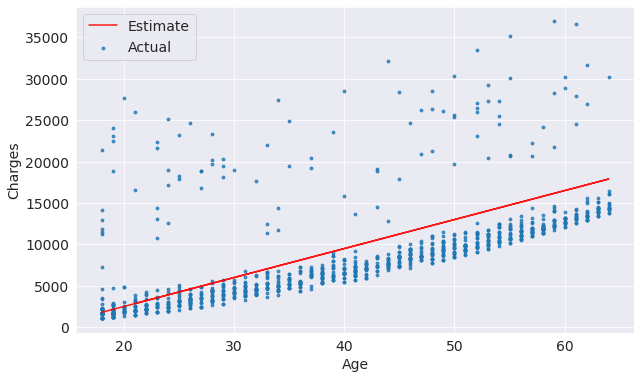

In [45]:
try_parameters(350, -4500)

In [46]:
!pip install numpy --quiet

In [47]:
import numpy as np


In [48]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [49]:
w = 50
b = 100
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [50]:
rmse(targets, predicted)

8461.949562575488

In [51]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)
    
  plt.plot(ages, predictions, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual']);

  loss = rmse(target, predictions)
  print('RMSE Loss: ', loss)

RMSE Loss:  4880.512474888769


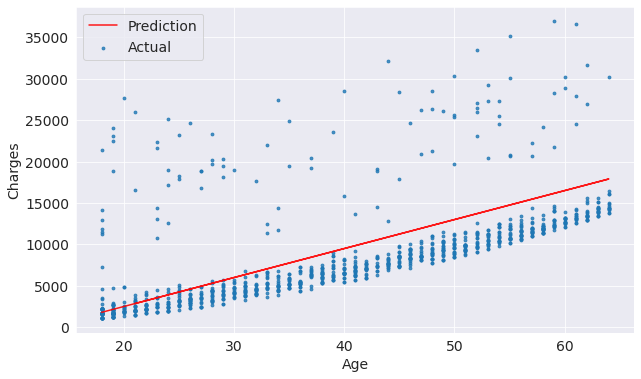

In [52]:
try_parameters(350, -4500)

In [53]:
!pip install scikit_learn --quiet

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [56]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [57]:
model.fit(inputs, targets)

LinearRegression()

In [60]:
model.predict(np.array([[69]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([16348.75442879])

In [61]:
predictions = model.predict(inputs)

In [62]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [63]:
rmse(targets, predictions)

4662.505766636391

In [64]:
#w
model.coef_

array([267.24891283])

In [65]:
#b
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636391


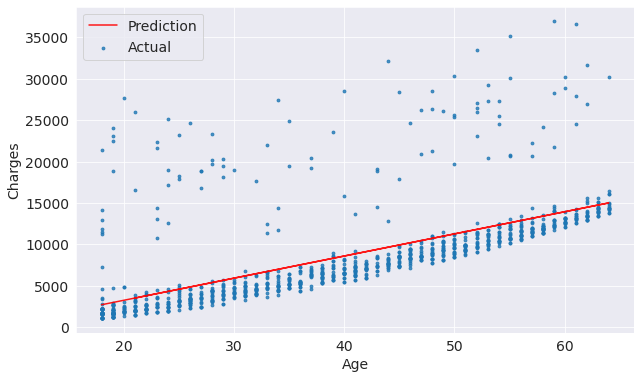

In [66]:
try_parameters(model.coef_, model.intercept_)

In [67]:
#Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

#Create and train model
model = LinearRegression()
model.fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.505766636391


In [68]:
#Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

#Create and train model
model = LinearRegression()
model.fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.312835461297


In [69]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [70]:
#Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

#Create and train model
model = LinearRegression()
model.fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038245


In [71]:
#Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

#Create and train model
model = LinearRegression()
model.fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.317901125969


In [72]:
#Create inputs and targets
inputs, targets = medical_df[['age']], medical_df['charges']

#Create and train model
model = LinearRegression()
model.fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11551.665620756308


In [73]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [74]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [75]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [78]:
#Create inputs and targets
inputs, targets = medical_df[['age','smoker_code', 'children']], medical_df['charges']

#Create and train model
model = LinearRegression()
model.fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6362.659217010639


In [79]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [80]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [81]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [82]:
#Create inputs and targets
inputs, targets = medical_df[['age','smoker_code', 'children', 'sex_code']], medical_df['charges']

#Create and train model
model = LinearRegression()
model.fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6362.585825339093


In [83]:
from sklearn import preprocessing

In [84]:
enc = preprocessing.OneHotEncoder()

In [87]:
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [88]:
one_hot = enc.transform(medical_df[['region']]).toarray()

In [89]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [90]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [97]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


In [98]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [99]:
model.intercept_

-12525.547811195444

In [101]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [104]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [107]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])

In [105]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [106]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [109]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174454


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.1)

In [112]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6376.377831983766


In [113]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6005.039205002226
